In [125]:
# read variables iwc,zKu, iwc_label and zw_label from file cloudSat_thr01.nc
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
with nc.Dataset('cloudSat_thr01.nc','r') as f:
    iwc=f.variables['iwc'][:]
    zW=f.variables['zKu'][:]
    iwc_label=f.variables['iwc_label'][:]
    zw_label=f.variables['zw_label'][:]
    dm=f.variables['dm'][:]
    print(iwc.shape)



(138606, 50)


[ 0.08061103 -1.50649553]
0.031153329321378886


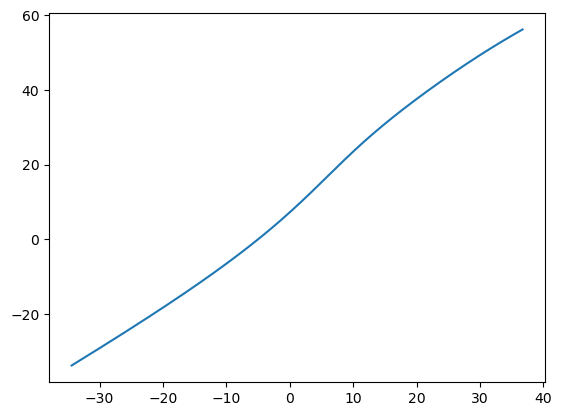

In [126]:
import pickle
from kazrRet import *
iwcCoeff_SSRG=np.polyfit(zST[2,:],np.log10(iwcST[2,:]),1)
print(iwcCoeff_SSRG)
print(10**iwcCoeff_SSRG[1])
plt.plot(zST[2,:],zST[0,:])

In [127]:
dnCoeff=np.array([0.01381017, 0.54397871])
dnCoeff=np.array([0.01975583, 0.22])
dn1D=np.polyval(dnCoeff,range(50))
print(zW.shape)
print(dm.max(axis=0))
print(dmST[0,0:20])


(138606, 50)
[0.31192937 0.33809286 0.35744777 0.37195235 0.41058844 0.46235535
 0.46263444 0.47131532 0.5521438  0.6212828  0.6408505  0.62268186
 0.58583707 0.5819118  0.5844791  0.59566337 0.56316006 0.5533423
 0.5390943  0.5520178  0.5550678  0.5897066  0.61752826 0.5609575
 0.5353459  0.5399928  0.5377109  0.49898368 0.481289   0.46768564
 0.44923514 0.473076   0.48324707 0.49059814 0.5336145  0.5669851
 0.5706211  0.5381375  0.5041886  0.45757732 0.43015337 0.36876628
 0.35827994 0.35271344 0.3152838  0.26360294 0.2455849  0.24393797
 0.2368187  0.24761197]
[0.18200149 0.18335478 0.18471853 0.18609296 0.18747827 0.18887477
 0.19028275 0.19170234 0.19313385 0.19457743 0.19603339 0.19750187
 0.19898307 0.20047718 0.20198448 0.20350502 0.20503902 0.20658669
 0.20814821 0.20972365]


In [129]:
with nc.Dataset('kext_atm.nc','r') as f:
    kext_atm=f.variables['kext_atm'][:]
    kext_atm=np.array(kext_atm)

with nc.Dataset('profiles.nc','r') as f:
    qv=f.variables['qv'][:]
    press=f.variables['press'][:]
    temp=f.variables['temp'][:]
    tempm=f.variables['tempm'][:]
    pressf=f.variables['pressf'][:]
    rho=f.variables['rho'][:]

kextCoeffL=[np.polyfit(zST[k,:200],np.log10(kextST[k,:200]),1) for k in range(4)]

npart=4
undef=0.0
nrefl=2
ice_type=1
import lidarSim as lidar
def get_pnorm(nz,dr,temp1,pres1,presf1,qv1,iwc1,rho1,dm_ice):
    h1=dr/2+np.arange(nz)*dr
    h1f=np.arange(nz)*dr
    q_lsice1=iwc1/rho1*1e-3
    q_lsice=q_lsice1[np.newaxis,:]
    pres1=pres1[np.newaxis,:]
    presf1=presf1[np.newaxis,:]
    temp1=temp1[np.newaxis,:]
    q_lsliq=np.zeros((1,nz),float)
    ls_radice=dm_ice/2*1e-3
    ls_radice=ls_radice[np.newaxis,:]
    ls_radliq=np.zeros((1,nz),float)
    q_cvice=np.zeros((1,nz),float)
    cv_radice=np.zeros((1,nz),float)
    q_cvliq=np.zeros((1,nz),float)
    cv_radliq=np.zeros((1,nz),float)
    temp=temp1
    pres=pres1
    presf=presf1
    pmol,pnorm,pnorm_perp_tot,\
        tautot,betatot_liq,\
        betatot_ice,\
        betatot,refl, \
        zheight,\
        beta_mol, tau_mol,\
        alpha= lidar.lidar_simulator(npart,nrefl,undef,\
                                     pres1,presf1,\
                                     temp1,
                                     q_lsliq,q_lsice,\
                                     q_cvliq,\
                                     q_cvice,\
                                     ls_radliq,\
                                     ls_radice,\
                                     cv_radliq,cv_radice,\
                                     ice_type)
    return pmol,pnorm


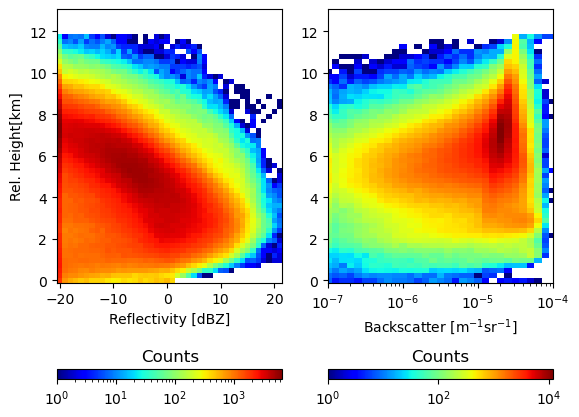

In [130]:
zkuCoeff=np.polyfit(zST[2,:30],(zST[0,:30]),1)
dmCoeff=np.polyfit(zST[2,:30],np.log(dmST[2,:30]),1)
iwcLowCoeff=np.polyfit(zST[2,:30],np.log(iwcST[2,:30]),1)
kextCoeffL=[np.polyfit(zST[k,:30],np.log10(kextST[k,:30]),1) for k in range(4)]
zcfad=np.zeros((42,55),float)
zwcfad=np.zeros((42,55),float)
bcfad=np.zeros((40,55),float)
nt=zW.shape[0]
iwp1L,iwp2L=[],[]
dn1D=np.polyval(dnCoeff,range(50))+1.85
fisot=2.7
umu=np.cos(np.deg2rad(0.0))
nt1,nz=qv.shape
height=np.arange(nz+1)*0.240
nt=zW.shape[0]
iwc_SSRG=np.zeros((nt,50),float)
dm_SSRG=np.zeros((nt,50),float)
tbL=[]
pnorm_SSRG=np.zeros((nt,50),float)
zKu=np.zeros((50),float)-99
zKuL=[]
pnormL=[]
pmolL=[]
dm_SSRGL=[]
iwc_SSRGL=[]
iwcL=[]
epsL=[]
for i1 in range(int(nt/1)):
    zw1=zW[i1,:]
    a1=np.nonzero(zw1>-22)
    iwp1=0.0
    iwp2=0.0
    kextI=np.zeros((50,4),float)
    salbI=np.zeros((50,4),float)
    asymI=np.zeros((50,4),float)
    ic=np.random.randint(0,30)
    kext1D=kext_atm[ic,:,:].copy()
    salb1D=np.zeros((64,4),float)
    asym1D=np.zeros((64,4),float)
    for k in a1[0]:
        zw11=zw1[k] 
        k0=k
        ifind = lidSim.bisection2(zST[2,:],zw11-10.*dn1D[k])
        ifind-=1
        #print(zST[2,ifind-1],zw11,zST[2,ifind])
        dz=zST[2,ifind+1]-zST[2,ifind]
        w1=(zw11-10.*dn1D[k]-zST[2,ifind])/dz
        z1ku=zST[0,ifind]*w1+zST[0,ifind+1]*(1-w1)+10*dn1D[k]
        iwc1=(iwcST[2,ifind]*w1+iwcST[2,ifind+1]*(1-w1))*10**dn1D[k]
        dm1=(dmST[2,ifind]*w1+dmST[2,ifind+1]*(1-w1))
        if zw11-10*dn1D[k]<zST[2,0]:
            z1ku=zkuCoeff[0]*(zw11-10*dn1D[k])+zkuCoeff[1]+10*dn1D[k]
            iwc1=np.exp(iwcLowCoeff[0]*(zw11-10*dn1D[k])+iwcLowCoeff[1])*10**dn1D[k]
            dm1=np.exp(dmCoeff[0]*(zw11-10*dn1D[k])+dmCoeff[1])
        i0=int(z1ku+20)
        if zw11-10*dn1D[k]>=zST[2,0]:
            for ifreq in range(4):
                kextI[k,ifreq]=kextST[ifreq+2,ifind]*10**(dn1D[k])
                salbI[k,ifreq]=kscaST[ifreq+2,ifind]
                asymI[k,ifreq]=gST[ifreq+2,ifind]
        else:
            for ifreq in range(4):
                kextI[k,ifreq]=10**(kextCoeffL[ifreq][0]*(zw11-10*dn1D[k])+kextCoeffL[ifreq][1]+dn1D[k])
                salbI[k,ifreq]=kextI[k,ifreq]*kscaST[ifreq+2,0]/kextST[ifreq+2,0]  
                asymI[k,ifreq]=gST[ifreq+2,0]
        if i0>=0 and i0<42 and k0>=0 and k0<55:
            zcfad[i0,k0]+=1
        zKu[k]=z1ku
        i0=int(zw11+20)
        if i0>=0 and i0<42 and k0>=0 and k0<55:
            zwcfad[i0,k0]+=1
        iwp1+=iwc1
        iwp2+=iwc[i1,k]
        iwc_SSRG[i1,k]=iwc1
        dm_SSRG[i1,k]=dm1

    kext1D[14:64,:]+=kextI[:,:]
    salb1D[14:64,:]=salbI[:,:]
    asym1D[14:64,:]=asymI[:,:]
    salb1D/=kext1D
    emis=0.8+np.random.random()*0.2
    ebar=emis
    tb1=[]
    iwcL.append(iwc[i1,:])
    for ik in range(4):
        tbout = lidSim.radtran(umu,temp[ic][0],temp[ic],height,kext1D[:,ik],salb1D[:,ik],asym1D[:,ik],fisot,emis,ebar)
        tb1.append(tbout)
        if tbout!=tbout:
            stop
    tbL.append(tb1)
    nz=50
    dr=0.240
    temp1=temp[ic,14:64]
    pres1=press[ic,14:64]
    presf1=pressf[ic,14:65]
    qv1=qv[ic,14:64]
    iwc1=iwc_SSRG[i1,:]
    rho1=pres1/(287.05*temp1)
    dm_ice=dm_SSRG[i1,:]
    pmol,pnorm=get_pnorm(nz,dr,temp1,pres1,presf1,qv1,iwc1,rho1,dm_ice)
    for k in range(50):
        bscat1=pnorm[0,k]-pmol[0,k]
        if bscat1<1e-8:
            continue
        #if iwc1[k]<1e-4 or dm_ice[k]==0:
        #    continue
        #i0=int((np.log10(dm_ice[k])+4)*10)
        i0=int((np.log10(bscat1)+7)*10)
        if i0>=0 and i0<40:
            bcfad[i0,k]+=1
    pnorm_SSRG[i1,:]=pnorm
    pnormL.append(pnorm[0,:])
    pmolL.append(pmol[0,:])
    zKuL.append(zKu)
    dm_SSRGL.append(dm_ice)
    iwc_SSRGL.append(iwc1)
    iwp1L.append(iwp1)
    iwp2L.append(iwp2)
    epsL.append(emis)
fig=plt.figure()
plt.subplot(121)
plt.pcolormesh(-20+np.arange(42),np.arange(55)*0.24,\
                zcfad[:,:].T,norm=matplotlib.colors.LogNorm(),cmap='jet')
ax = plt.gca()  
box = ax.get_position()
plt.xlabel("Reflectivity [dBZ]")
plt.ylabel("Rel. Height[km]")
ax.set_position([box.x0, box.y0+0.2, box.width, box.height-0.2])

cax1=fig.add_axes([box.x0, box.y0, box.width, 0.02])
cb1=plt.colorbar(cax=cax1,orientation='horizontal')
cb1.ax.set_title('Counts')
plt.subplot(122)
plt.pcolormesh(10**(-7+np.arange(40)*0.1),\
    0+np.arange(55)*0.24,bcfad[:,:].T,norm=matplotlib.colors.LogNorm(),cmap='jet')
plt.xscale('log')
#plt.xlim(0.01,1)
ax = plt.gca()  
box = ax.get_position()
plt.xlabel("Backscatter [m$^{-1}$sr$^{-1}$]")
plt.xlim(1e-7,1e-4)
#plt.ylabel("Height[km]")
ax.set_position([box.x0, box.y0+0.2, box.width, box.height-0.2])

cax1=fig.add_axes([box.x0, box.y0, box.width, 0.02])
cb1=plt.colorbar(cax=cax1,orientation='horizontal')
cb1.ax.set_title('Counts')
plt.savefig('obsCFADs.png')

import xarray as xr
ds=xr.Dataset({'tb':(['time','chan'],tbL),
                'zKu':(['time','height'],zKuL),
                'pnorm':(['time','height'],1e3*np.array(pnormL)),
                'pmol':(['time','height'],1e3*np.array(pmolL)),
                'iwc_SSRG':(['time','height'],iwc_SSRGL),
                'iwc_CS':(['time','height'],iwcL),
                'dm_SSRG':(['time','height'],dm_SSRGL),
                'eps':(['time'],epsL)},
                coords={'time':np.arange(len(tbL)),
                        'chan':np.arange(4),
                        'height':np.arange(50)})

ds.to_netcdf('obsSSRG_nadir.nc',encoding={'tb': {'zlib': True, 'complevel': 9},\
    'zKu': {'zlib': True, 'complevel': 9},\
    'pnorm': {'zlib': True, 'complevel': 9},'pmol': {'zlib': True, 'complevel': 9},\
    'iwc_SSRG': {'zlib': True, 'complevel': 9},'dm_SSRG': {'zlib': True, 'complevel': 9},\
    'iwc_CS': {'zlib': True, 'complevel': 9},'eps': {'zlib': True, 'complevel': 9}})

1.2902850228539158 1.3531495220486405


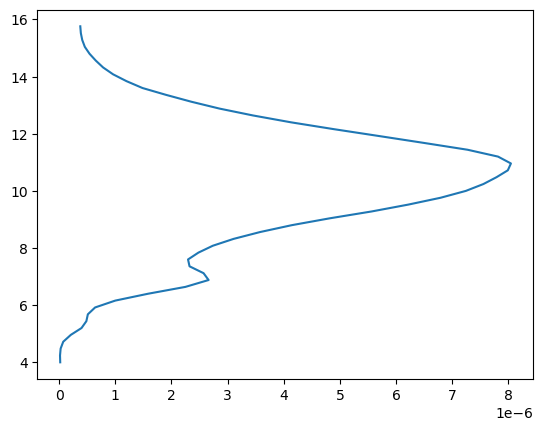

In [116]:
plt.plot(pnorm_SSRG.mean(axis=0),4+np.arange(50)*0.24)
print(np.mean(iwp1L),np.mean(iwp2L))

In [9]:
import lidarSim as lidSim

dmCoeff=np.polyfit(zST[2,:200],np.log10(dmST[2,:200]),1)
iwcLowCoeff=np.polyfit(zST[2,:200],np.log10(iwcST[2,:200]),1)
for i in range(-nt):
    zw1=zW[i,:]
    a1=np.nonzero(zw1>-22)
    kextI=np.zeros((50,4),float)
    salbI=np.zeros((50,4),float)
    asymI=np.zeros((50,4),float)
    ic=np.random.randint(0,30)
    kext1D=kext_atm[ic,:,:].copy()
    salb1D=np.zeros((64,4),float)
    asym1D=np.zeros((64,4),float)
    for k in a1[0]:
        ifind = lidSim.bisection2(zST[2,:],zw1[k]-10*(dn1Da[k]))
        iwc_SSRG[i,k]=iwcST[2,ifind]*10**(dn1Da[k])
        zKu[i,k]=zST[0,ifind]+10*(dn1Da[k])
        dm_SSRG[i,k]=10**(dmCoeff[0]*(zw1[k]-10*dn1Da[k])+dmCoeff[1])


In [10]:

#dn1D*=0
dmCoeff=np.polyfit(zST[2,:],np.log10(dmST[2,:]),1)
iwcLowCoeff=np.polyfit(zST[2,:200],np.log10(iwcST[2,:200]),1)

print(dmCoeff)
dn1Da=dn1D+1.95
tbL=[]
epsL=[]
zKu=np.zeros((nt,50),float)-99.9
zKuL=[]
pnormL=[]
for i in range(nt):
    zw1=zW[i,:]
    a1=np.nonzero(zw1>-22)
    
    for k in a1[0]:
        ifind = lidSim.bisection2(zST[2,:],zw1[k]-10*(dn1Da[k]))
        iwc_SSRG[i,k]=iwcST[2,ifind]*10**(dn1Da[k])
        zKu[i,k]=zST[0,ifind]+10*(dn1Da[k])
        dm_SSRG[i,k]=10**(dmCoeff[0]*(zw1[k]-10*dn1Da[k])+dmCoeff[1])
        if ifind==1:
            iwc_SSRG[i,k]=10**(iwcLowCoeff[0]*(zw1[k]-10*dn1Da[k])+iwcLowCoeff[1]+dn1Da[k])
            for ifreq in range(4):
                kextI[k,ifreq]=10**(kextCoeffL[ifreq][0]*(zw1[k]-10*dn1Da[k])+kextCoeffL[ifreq][1]+dn1Da[k])
                salbI[k,ifreq]=kextI[k,ifreq]*kscaST[ifreq+2,0]/kextST[ifreq+2,0]  
                asymI[k,ifreq]=gST[ifreq+2,0]
            zKu[i,k]=zw1[k]
        else:
            for ifreq in range(4):
                kextI[k,ifreq]=kextST[ifreq+2,ifind]*10**(dn1Da[k])
                salbI[k,ifreq]=kscaST[ifreq+2,ifind]
                asymI[k,ifreq]=gST[ifreq+2,ifind]
    nz=50
    dr=0.240
    temp1=temp[ic,14:64]
    pres1=press[ic,14:64]
    presf1=pressf[ic,14:65]
    qv1=qv[ic,14:64]
    iwc1=iwc_SSRG[i,:]
    rho1=pres1/(287.05*temp1)
    dm_ice=dm_SSRG[i,:]
    pmol,pnorm=get_pnorm(nz,dr,temp1,pres1,presf1,qv1,iwc1,rho1,dm_ice)
    
    kext1D[14:64,:]+=kextI[:,:]
    salb1D[14:64,:]=salbI[:,:]
    asym1D[14:64,:]=asymI[:,:]
    salb1D/=kext1D
    emis=0.8+np.random.random()*0.2
    ebar=emis
    tb1=[]
    for ik in range(4):
        tbout = lidSim.radtran(umu,temp[ic][0],temp[ic],height,kext1D[:,ik],salb1D[:,ik],asym1D[:,ik],fisot,emis,ebar)
        tb1.append(tbout)
        if tbout!=tbout:
            stop
    tbL.append(tb1)
    zKuL.append(zKu[i,:])
    epsL.append(emis)
    pnormL.append(pnorm[0,:])
    pmolL.append(pmol[0,:])
import xarray as xr
ds=xr.Dataset({'tb':(['time','chan'],tbL),
                'zKu':(['time','height'],zKuL),
                'pnorm':(['time','height'],1e3*np.array(pnormL)),
                'pmol':(['time','height'],1e3*np.array(pmolL)),
                'iwc_SSRG':(['time','height'],iwc_SSRG),
                'eps':(['time'],epsL)},
                coords={'time':np.arange(len(tbL)),
                        'chan':np.arange(4),
                        'height':np.arange(50)})

#ds.to_netcdf('simObsInclined.nc',format='NETCDF4')
ds.to_netcdf('simObsInclined_195.nc',format='NETCDF4',encoding={'tb':{'zlib':True,'complevel':5},\
    'zKu':{'zlib':True,'complevel':5},'iwc_SSRG':{'zlib':True,'complevel':5},\
        'pnorm':{'zlib':True,'complevel':5},\
        'pmol':{'zlib':True,'complevel':5},'eps':{'zlib':True,'complevel':5}})  



[ 0.0200911  -0.12390667]


In [150]:
print(np.array(pnormL).shape)
#print(tbL)
#write ds to a compressed netcdf file using encoding
#ds.to_netcdf('simObsInclined.nc',format='NETCDF4',encoding={'tb':{'zlib':True,'complevel':5},
#'zKu':{'zlib':True,'complevel':5},'eps':{'zlib':True,'complevel':5}})  




(10, 1, 50)


0.06873033762232066
0.078562036
[[1.         0.92743434]
 [0.92743434 1.        ]]


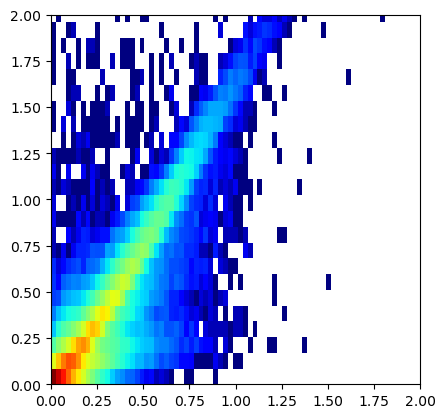

In [105]:
#print(dn1D)
a=np.nonzero(iwc_SSRG>0)
print(iwc_SSRG[a].mean())
print(iwc[a].mean())
print(np.corrcoef(iwc_SSRG[a],iwc[a]))
ax=plt.subplot(111)
iwc_hist2d=plt.hist2d(iwc_SSRG[a],iwc[a],bins=100,cmap='jet',norm=matplotlib.colors.LogNorm())
plt.xlim(0,2)
plt.ylim(0,2)
ax.set_aspect('equal')